In [36]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot
from scipy import stats

In [37]:
dataPath = 'Data/2016-2019(One station)/shair-8781-1-6-1.csv'
airQualityData=pd.read_csv(dataPath, header=14,sep=';').rename(columns={'Start':'Start','Slut':'Stop'})
airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2_5',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('O3.*','O3',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('Black Carbon.*','Black Carbon',x), inplace = True)
airQualityData['Start'] = pd.to_datetime(airQualityData['Start'])
airQualityData= airQualityData.drop('Stop',axis=1)
one_feature=airQualityData.drop(columns=['Black Carbon','O3'])#
one_feature.head(5)

,Start,NO2,NOX,PM10,PM2_5
0,2015-01-01 00:00:00,4.5,6.2,28.4,22.9
1,2015-01-01 01:00:00,3.1,3.7,8.5,5.5
2,2015-01-01 02:00:00,2.1,2.9,8.7,3.6
3,2015-01-01 03:00:00,1.6,2.2,10.5,4.8
4,2015-01-01 04:00:00,1.4,2.1,12.1,5.6


In [38]:
one_feature.loc[(one_feature['PM10'] <= 0, 'PM10')]=np.nan
one_feature.loc[(one_feature['NO2'] <= 0, 'NO2')]=np.nan
one_feature.loc[(one_feature['PM2_5'] <= 0, 'PM2_5')]=np.nan
one_feature.loc[(one_feature['NOX'] <= 0, 'NOX')]=np.nan
one_feature=one_feature.fillna(0)

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_down=one_feature.copy()
scaled_down['PM10']=sc.fit_transform(scaled_down['PM10'].values.reshape(-1, 1))
scaled_down['NO2']=sc.fit_transform(scaled_down['NO2'].values.reshape(-1, 1))
scaled_down['PM2_5']=sc.fit_transform(scaled_down['PM2_5'].values.reshape(-1, 1))
scaled_down['NOX']=sc.fit_transform(scaled_down['NOX'].values.reshape(-1, 1))

In [40]:
train=scaled_down[(scaled_down['Start']<= "2018-12-31 23:00:00")]
test=scaled_down[(scaled_down['Start'] >= "2019-01-01 00:00:00")]
train=train.drop('Start',axis = 1)
test=test.drop('Start',axis = 1)
test= test.reset_index().drop('index',axis=1)

In [41]:
training_set=train['PM10']
X_train = []
y_train = []
for i in range(5, len(training_set)):
    X_train.append(training_set.iloc[i-5:i])
    y_train.append(training_set.iloc[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(35059, 5)


In [11]:
training_set

0        0.174662
1        0.052276
2        0.053506
3        0.064576
4        0.074416
           ...   
35059    0.029520
35060    0.047970
35061    0.045510
35062    0.041205
35063    0.043665
Name: PM10, Length: 35064, dtype: float64

In [42]:
testing_set=test['PM10']
X_test = []
y_test = []
for i in range(5, len(testing_set)):
    X_test.append(testing_set.iloc[i-5:i])
    y_test.append(testing_set.iloc[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)
print (X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(8755, 5)


In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='MSE', optimizer='adam')

history = model.fit(X_train, y_train, epochs=50,
                    batch_size=72, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False,callbacks=[callback])

Epoch 1/50
487/487 - 3s - loss: 0.0014 - val_loss: 0.0012
Epoch 2/50
487/487 - 2s - loss: 9.9966e-04 - val_loss: 9.2811e-04
Epoch 3/50
487/487 - 2s - loss: 9.0155e-04 - val_loss: 8.5515e-04
Epoch 4/50


KeyboardInterrupt: 

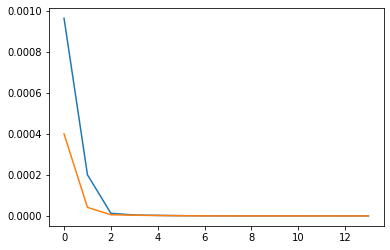

In [15]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')#orange is validation loss

# Testing

In [16]:
dataPath = 'Data/2016-2019(One station)/shair-8779-1-6-3.csv'
airQualityData=pd.read_csv(dataPath, header=12,sep=';').rename(columns={'Start':'Start','Slut':'Stop'})
airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2_5',x), inplace = True)
airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
airQualityData['Start'] = pd.to_datetime(airQualityData['Start'])
airQualityData= airQualityData.drop('Stop',axis=1)

one_feature.head(5)
one_feature.loc[(one_feature['PM10'] <= 0, 'PM10')]=np.nan
one_feature.loc[(one_feature['NO2'] <= 0, 'NO2')]=np.nan
one_feature.loc[(one_feature['PM2_5'] <= 0, 'PM2_5')]=np.nan
one_feature.loc[(one_feature['NOX'] <= 0, 'NOX')]=np.nan
one_feature=one_feature.fillna(0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_down=one_feature.copy()
scaled_down['PM10']=sc.fit_transform(scaled_down['PM10'].values.reshape(-1, 1))
scaled_down['NO2']=sc.fit_transform(scaled_down['NO2'].values.reshape(-1, 1))
scaled_down['PM2_5']=sc.fit_transform(scaled_down['PM2_5'].values.reshape(-1, 1))
scaled_down['NOX']=sc.fit_transform(scaled_down['NOX'].values.reshape(-1, 1))

In [19]:
train=scaled_down[(scaled_down['Start']<= "2018-12-31 23:00:00")]
test=scaled_down[(scaled_down['Start'] >= "2019-01-01 00:00:00")]
train=train.drop('Start',axis = 1)
test=test.drop('Start',axis = 1)

test= test.reset_index().drop('index',axis=1)

In [24]:
training_set=train['PM10']
X_train = []
y_train = []
for i in range(5, len(training_set)):
    X_train.append(training_set.iloc[i-5:i])
    y_train.append(training_set.iloc[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(35059, 6)


In [32]:
testing_set=test['PM10']
X_test = []
y_test = []
for i in range(5, len(testing_set)):
    X_test.append(testing_set.loc[i-5:i])
    y_test.append(testing_set.loc[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)
print (X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(8755, 6)


In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mean_squared_error(sc.inverse_transform(y_test.reshape(-1,1)),sc.inverse_transform(model.predict(X_test)))

0.009748136884516877

In [99]:
from sklearn.metrics import r2_score
r2_score(sc.inverse_transform(y_test.reshape(-1,1)), sc.inverse_transform(model.predict(X_test)))

0.9999848768227679

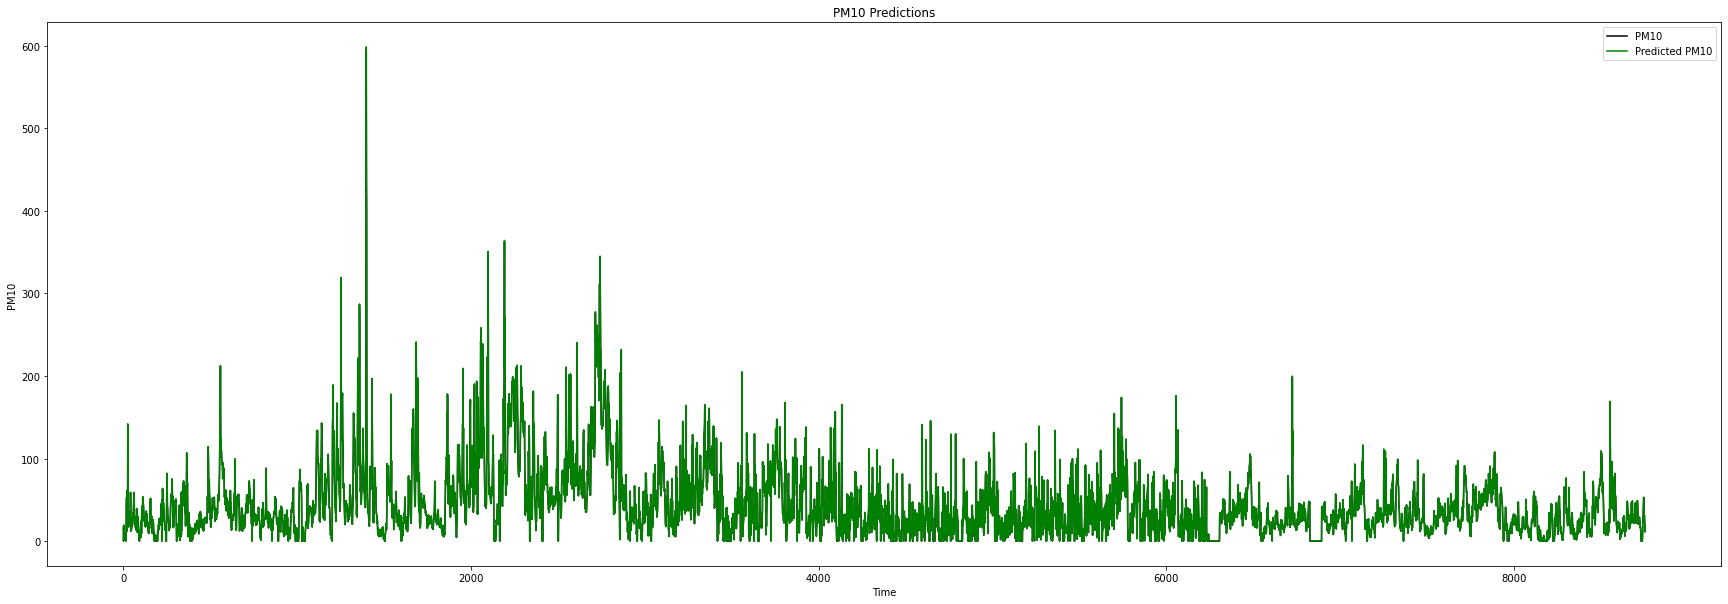

In [91]:
plt.figure(figsize=(30,10))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)), color = 'black', label = 'PM10')
plt.plot(sc.inverse_transform(model.predict(X_test)), color = 'green', label = 'Predicted PM10')
plt.title('PM10 Predictions')
plt.xlabel('Time')
plt.ylabel('PM10')
plt.legend()
plt.show()

# Federated

In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import math
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_federated as tff

In [2]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

In [3]:
from sklearn.preprocessing import MinMaxScaler

dataPath = 'Data/2016-2019(NO2, NOX, PM2.5)'
listOfDataFrames=[]
stations=os.listdir(dataPath)
for station in stations:
    print("Processing year: "+ dataPath +" station: "+station)
    airQualityData=pd.read_csv(dataPath+'\\'+station, header=12,sep=';').rename(columns={'Start':'Start','Slut':'Stop'})
    airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2_5',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
    listOfDataFrames.append(airQualityData)
    
airQualityData= pd.DataFrame(columns= [])
list_of_training=[]
list_of_testing=[]

for index, airData in enumerate(listOfDataFrames):
    df= airData
    #df['origin']="station{}".format(index)
    
    df.loc[(df['PM10'] <= 0, 'PM10')]=np.nan
    df.loc[(df['NO2'] <= 0, 'NO2')]=np.nan
    df.loc[(df['PM2_5'] <= 0, 'PM2_5')]=np.nan
    df.loc[(df['NOX'] <= 0, 'NOX')]=np.nan
    df=df.fillna(0)
    
    
    sc = MinMaxScaler(feature_range = (0, 1))
    scaled_down=df.copy()
    scaled_down['PM10']=sc.fit_transform(scaled_down['PM10'].values.reshape(-1, 1))
    scaled_down['NO2']=sc.fit_transform(scaled_down['NO2'].values.reshape(-1, 1))
    scaled_down['PM2_5']=sc.fit_transform(scaled_down['PM2_5'].values.reshape(-1, 1))
    scaled_down['NOX']=sc.fit_transform(scaled_down['NOX'].values.reshape(-1, 1))
    
    train=scaled_down[(scaled_down['Start']<= "2018-12-31 23:00:00")]
    test=scaled_down[(scaled_down['Start'] >= "2019-01-01 00:00:00")]
    train=train.drop('Start',axis = 1)
    test=test.drop('Start',axis = 1)
    test= test.reset_index().drop('index',axis=1)
    
    list_of_training.append(train)
    list_of_testing.append(test)
    
    airQualityData=airQualityData.append(df)
    
    
    
airQualityData['Start'] = pd.to_datetime(airQualityData['Start'])
print(airQualityData.head(5))
print(airQualityData.shape)

Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-18644-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-8779-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-8780-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-8781-1-6-1.csv
                Start              Stop   NO2   NOX  PM10  PM2_5
0 2015-01-01 00:00:00  2015-01-01 01:00  11.0  18.8  27.9   19.8
1 2015-01-01 01:00:00  2015-01-01 02:00  15.3  25.0  15.5    4.5
2 2015-01-01 02:00:00  2015-01-01 03:00  13.4  19.8  17.1    4.6
3 2015-01-01 03:00:00  2015-01-01 04:00   9.6  13.8  15.2    5.3
4 2015-01-01 04:00:00  2015-01-01 05:00   3.5   5.8  16.3    6.6
(175296, 6)


In [4]:
def arrange_y_x(list_of_data):
    x_list=[]
    y_list=[]
    for dataset in list_of_data:
        training_set=dataset['PM10']
        X_train = []
        y_train = []
        for i in range(5, len(training_set)):
            X_train.append(training_set.iloc[i-5:i])
            y_train.append(training_set.iloc[i])

        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        
#         X_train=X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        print(X_train.shape)
        x_list.append(X_train)
        y_list.append(y_train)
    return x_list,y_list

In [5]:
x_train_list,y_train_list=arrange_y_x(list_of_training)
x_test_list,y_test_list=arrange_y_x(list_of_testing)

(35059, 5, 1)
(35059, 5, 1)
(35059, 5, 1)
(35059, 5, 1)
(8754, 5, 1)
(8754, 5, 1)
(8754, 5, 1)
(8754, 5, 1)


In [6]:
import collections
import tensorflow as tf
from sklearn.model_selection import train_test_split

NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
      return collections.OrderedDict(x=element['x'], y=element['y'])

  return dataset.batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

# produce datasets for each origin
def make_federated_data(X_train, y_train, X_test, y_test):
        
        train_dataset = tf.data.Dataset.from_tensor_slices(
            ({'x': X_train, 'y': y_train}))
        
        test_dataset = tf.data.Dataset.from_tensor_slices(
            ({'x': X_test, 'y': y_test}))

        preprocessed_train_dataset = preprocess(train_dataset)
        preprocessed_test_dataset = preprocess(test_dataset)
        
        
        
        return preprocessed_train_dataset, preprocessed_test_dataset 

def prepapre_all_federated_data(x_train_list,y_train_list,x_test_list,y_test_list):
    train_datasets = []
    test_datasets = []
    for X_train,y_train, X_test, y_test in zip(x_train_list,y_train_list,x_test_list,y_test_list):
        preprocessed_train_dataset,preprocessed_test_dataset=make_federated_data(X_train, y_train, X_test, y_test)
        train_datasets.append(preprocessed_train_dataset)
        test_datasets.append(preprocessed_test_dataset)    
    
    return train_datasets, test_datasets

In [7]:
train_datasets, test_datasets = prepapre_all_federated_data(x_train_list,y_train_list,x_test_list,y_test_list)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
def build_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(5,1)))
    model.add(Dense(1))
    return model

In [13]:
def create_tff_model():
      return tff.learning.from_keras_model(build_model(), 
                                       input_spec=train_datasets[0].element_spec,
                                       loss=tf.keras.losses.MeanSquaredError(),
                                       metrics=[tf.keras.metrics.MeanSquaredError()])

In [14]:
print("Create averaging process")
iterative_process = tff.learning.build_federated_averaging_process(model_fn=create_tff_model,
                                                                   client_optimizer_fn = lambda: tf.keras.optimizers.SGD(0.002))

Create averaging process


In [15]:
print("Initzialize averaging process")
state = iterative_process.initialize()

print("Start iterations")
for _ in range(10):
  state, metrics = iterative_process.next(state, train_datasets)
  print('metrics={}'.format(metrics))

Initzialize averaging process
Start iterations
metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('mean_squared_error', 0.0043025543), ('loss', 0.004302647)]))])
metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('mean_squared_error', 0.0039570816), ('loss', 0.003957164)]))])
metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('mean_squared_error', 0.003799077), ('loss', 0.003799157)]))])
metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('mean_squared_error', 0.0036510383), ('loss', 0.0036511128)]))])
metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()

In [ ]:
# Global model evaluated over all clients
evaluation = tff.learning.build_federated_evaluation(model_fn=create_tff_model)
test_metrics = evaluation(state.model, test_datasets)
print(test_metrics)